In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [25]:
df1 = sns.load_dataset('iris')

In [5]:
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
from sklearn.datasets import load_iris

In [13]:
iris = load_iris()

In [27]:
df= pd.DataFrame(iris.data, columns = iris.feature_names)

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [31]:
df['target'] = iris.target

In [33]:
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
25,5.0,3.0,1.6,0.2,0
58,6.6,2.9,4.6,1.3,1
121,5.6,2.8,4.9,2.0,2
56,6.3,3.3,4.7,1.6,1
138,6.0,3.0,4.8,1.8,2


In [35]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


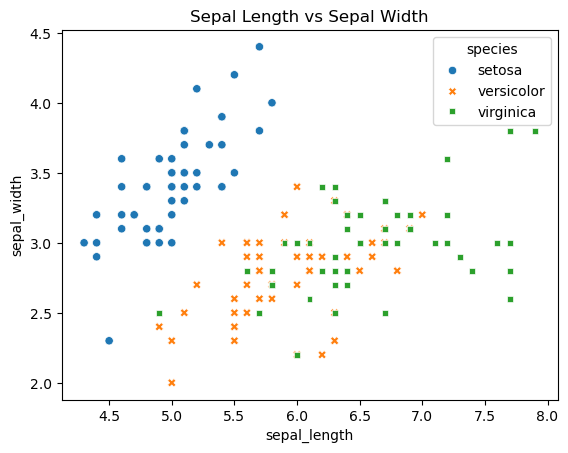

In [45]:
import matplotlib.pyplot as plt
sns.scatterplot(data=df1, x="sepal_length", y="sepal_width", hue="species", style="species")
plt.title("Sepal Length vs Sepal Width")
plt.show()


In [47]:
from sklearn.preprocessing import LabelEncoder

In [49]:
encoder = LabelEncoder()

In [61]:
df1['species']=encoder.fit_transform(df1['species'])

In [63]:
df1

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [73]:
new_df = df1[['sepal_length', 'petal_length', 'species']]

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
new_df.sample(3)

,sepal_length,petal_length,species
0,5.1,1.4,0
136,6.3,5.6,2
98,5.1,3.0,1


In [79]:
X = new_df.iloc[:, 0:2]
y = new_df.iloc[:, 2]

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=40)

In [85]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 2), (30, 2), (120,), (30,))

In [87]:
from sklearn.linear_model import LogisticRegression

In [89]:
lor = LogisticRegression(multi_class='multinomial')

In [93]:
lor.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(multi_class='multinomial')

In [95]:
y_predict = lor.predict(X_test)

In [103]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [99]:
a_s = accuracy_score(y_predict, y_test)

In [101]:
a_s

0.9666666666666667

In [105]:
c_m = confusion_matrix(y_predict, y_test)

In [109]:
pd.DataFrame(c_m)

,0,1,2
0,8,0,0
1,0,12,1
2,0,0,9


In [115]:
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.0 kB/s eta 0:00:00a 0:00:03


In [119]:
from mlxtend.plotting import plot_decision_regions

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<Axes: >

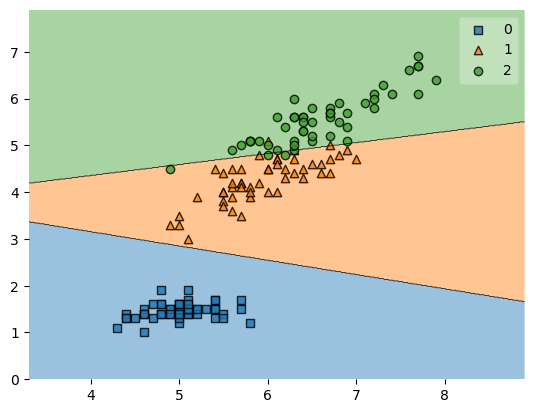

In [121]:
plot_decision_regions(X.values, y.values, lor)